# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy import stats
from scipy.stats import linregress
import pprint as pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information.
base = "http://api.openweathermap.org/data/2.5/weather?" 
units = "metric"

# Build partial query URL

url = f'{base}appid={weather_api_key}&units={units}&q='
response = requests.get(url + city)
weather = response.json()
print(json.dumps(weather, indent =4))

{
    "coord": {
        "lon": 50.8122,
        "lat": 9.4942
    },
    "weather": [
        {
            "id": 802,
            "main": "Clouds",
            "description": "scattered clouds",
            "icon": "03d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 25.94,
        "feels_like": 22.15,
        "temp_min": 25.94,
        "temp_max": 25.94,
        "pressure": 1012,
        "humidity": 54,
        "sea_level": 1012,
        "grnd_level": 1010
    },
    "visibility": 10000,
    "wind": {
        "speed": 8.2,
        "deg": 42
    },
    "clouds": {
        "all": 26
    },
    "dt": 1613121008,
    "sys": {
        "country": "SO",
        "sunrise": 1613098616,
        "sunset": 1613141113
    },
    "timezone": 10800,
    "id": 64814,
    "name": "Bandarbeyla",
    "cod": 200
}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [59]:
#create a City dataframe
citydf = pd.DataFrame({'City': cities})
citydf

,City
0,provideniya
1,havre-saint-pierre
2,faanui
3,rikitea
4,kishanganj
...,...
592,mendi
593,maltahohe
594,puerto leguizamo
595,zyryanka


In [60]:
#citydf["Country"] = ""
#citydf["Latitude"] = ""
#citydf["Longitude"] = ""
#citydf["Temperature (F)"] = ""
#citydf["Humidity"] = ""
#citydf["Cloudiness"] = ""
#citydf["Wind Speed (mph)"] = ""
place =[]
country = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness=[]
wind_speed= []
city_data = []


In [61]:
# Save config information.
base = "http://api.openweathermap.org/data/2.5/weather?" 
units = "metric"
ncity = 1

city_data = []

for city in cities:
    url = f'{base}appid={weather_api_key}&units={units}&q='
    
    try:
        response = requests.get(url + city).json()
        country = response["sys"]["country"]
        latitude= response["coord"]["lat"]
        longitude =response["coord"]["lon"]
        temperature = response["main"]["temp"]
        humidity =response["main"]["humidity"]
        cloudiness= response["clouds"]["all"]
        wind_speed=response["wind"]["speed"]
        city_data.append({"City":city, "Country": country, 'Latitude':latitude, 
                          "Longitude": longitude, "Temperature": temperature, "Humidity": humidity,
                         "Cloudiness": cloudiness, "Windspeed": wind_speed})
        
        print(f" City number:{ncity} {city}")
        
        ncity +=1
    
    except:
        print("Country not found")




 City number:1 provideniya
 City number:2 havre-saint-pierre
 City number:3 faanui
 City number:4 rikitea
 City number:5 kishanganj
 City number:6 nikolskoye
 City number:7 buguda
 City number:8 esna
 City number:9 east london
 City number:10 flin flon
Country not found
 City number:11 port-gentil
 City number:12 kerema
 City number:13 yellowknife
 City number:14 leningradskiy
 City number:15 mazagao
 City number:16 bathsheba
 City number:17 tocopilla
 City number:18 severo-kurilsk
 City number:19 bluff
 City number:20 dikson
 City number:21 tasiilaq
 City number:22 taman
 City number:23 ribeira grande
 City number:24 barrow
 City number:25 hay river
Country not found
 City number:26 sitka
 City number:27 puerto ayacucho
 City number:28 harper
 City number:29 inhambane
 City number:30 port pirie
 City number:31 hamilton
 City number:32 puerto ayora
 City number:33 tuktoyaktuk
 City number:34 waipawa
 City number:35 grindavik
 City number:36 ibra
 City number:37 chunskiy
 City number:38

 City number:295 kodino
 City number:296 viedma
 City number:297 lengshuijiang
 City number:298 bend
 City number:299 kathmandu
 City number:300 longyearbyen
 City number:301 gidole
 City number:302 marzuq
 City number:303 kang
 City number:304 sao fidelis
Country not found
 City number:305 ruteng
 City number:306 elizabeth city
 City number:307 valparaiso
 City number:308 sakaiminato
 City number:309 russell
 City number:310 arman
 City number:311 qui nhon
 City number:312 coquimbo
 City number:313 lalawigan
 City number:314 kindu
 City number:315 xudat
 City number:316 lompoc
 City number:317 kibakwe
 City number:318 vila velha
 City number:319 isla mujeres
 City number:320 shymkent
 City number:321 tazovskiy
 City number:322 vikulovo
 City number:323 lorengau
 City number:324 tomatlan
 City number:325 college
 City number:326 vanavara
 City number:327 mareeba
 City number:328 broome
 City number:329 fort nelson
 City number:330 blythe
 City number:331 eganville
 City number:332 raws

In [62]:
weatherdf =pd.DataFrame(city_data)
weatherdf["Temperature"] = round(1.8 * weatherdf['Temperature'] + 32,2)
weatherdf

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed
0,provideniya,RU,64.3833,-173.3000,-5.64,86,98,11.44
1,havre-saint-pierre,CA,50.2334,-63.5986,24.80,68,90,6.17
2,faanui,PF,-16.4833,-151.7500,81.75,68,29,4.58
3,rikitea,PF,-23.1203,-134.9692,79.38,70,9,2.02
4,kishanganj,IN,26.1167,87.9333,83.53,28,8,3.43
...,...,...,...,...,...,...,...,...
535,mendi,PG,-6.1761,143.6513,58.35,99,100,0.12
536,maltahohe,NA,-24.8333,16.9833,78.04,40,2,9.06
537,puerto leguizamo,CO,-0.1934,-74.7819,71.53,74,45,0.63
538,zyryanka,RU,65.7500,150.8500,-25.20,87,63,0.96


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [63]:
#no cities over 100% humidity
overhum = weatherdf[weatherdf["Humidity"]>100]
overhum

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed


In [64]:
#  Get the indices of cities that have humidity over 100%.
#N/A

In [65]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [66]:
#N/A

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

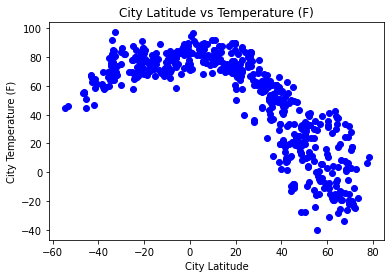

In [67]:
#scatterplot Temp vs Latitude

plt.scatter(weatherdf["Latitude"], weatherdf["Temperature"], facecolors = 'blue', marker = 'o')

plt.title("City Latitude vs Temperature (F)")
plt.xlabel("City Latitude")
plt.ylabel("City Temperature (F)")

plt.savefig('latvstemp.png')
plt.show()
#Observation: The closer the city is to the equator, the higher the temperature. 
#Also, the northern hemisphere cities are getting colder than the southern hemispherer cities.
#Factors to consider:  Winter vs Summer in the hemispheres.


## Latitude vs. Humidity Plot

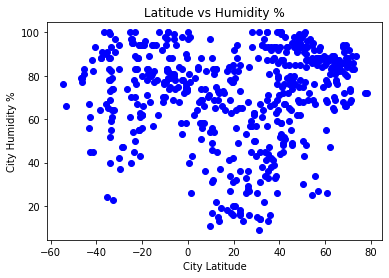

In [68]:
plt.scatter(weatherdf["Latitude"], weatherdf["Humidity"], facecolors = 'blue', marker = 'o')

plt.title("Latitude vs Humidity %")
plt.xlabel("City Latitude")
plt.ylabel("City Humidity %")
plt.savefig('latvshum.png')
plt.show()
#Observation: The cities closest to the equator does not necessarily mean the humidity percentage is higher.  
#If fact, some cities closer to the equator are less humidity right now than other cities. 
#Factors to consider:  Winter vs Summer in the hemispheres.

## Latitude vs. Cloudiness Plot

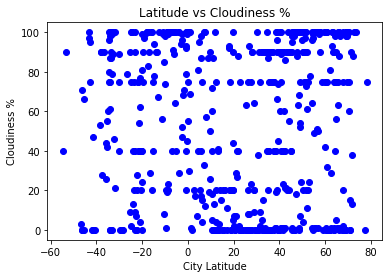

In [69]:
plt.scatter(weatherdf["Latitude"], weatherdf["Cloudiness"], facecolors = 'blue', marker = 'o')

plt.title("Latitude vs Cloudiness %")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness %")
plt.savefig('latvscloud.png')
plt.show()
#Observations: Cities tend to have more 0% cloudiness or 100% than anything in between no matter the city's latitude.

## Latitude vs. Wind Speed Plot

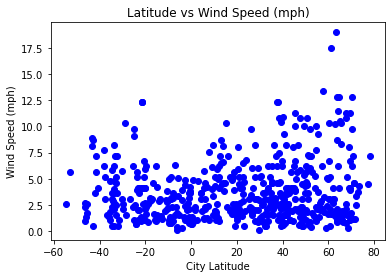

In [70]:
plt.scatter(weatherdf["Latitude"], weatherdf["Windspeed"], facecolors = 'blue', marker = 'o')

plt.title("Latitude vs Wind Speed (mph)")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig('latvswind.png')
plt.show()
#Observations: The city's latitude does not have a high correlation with the wind speed in that city. Most city's wind blows at about 5mph or lower each day.

## Linear Regression

In [71]:
#dataframe for just North Hemisphere
northtemp = weatherdf[weatherdf["Latitude"]>0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [72]:
#define the axis
x_values = northtemp['Latitude']
y_values = northtemp['Temperature']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#define regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
stats.linregress(x_values, y_values)

y = -1.51x +98.67


LinregressResult(slope=-1.5071501343495597, intercept=98.6727376676795, rvalue=-0.8660209266055193, pvalue=8.021260071568106e-113, stderr=0.04536082666695079)

The r value is: 0.7499922453186822


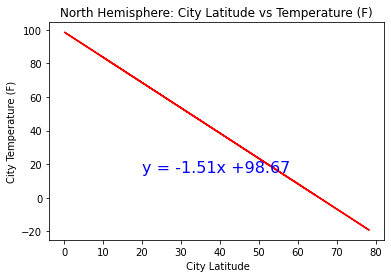

In [74]:
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("North Hemisphere: City Latitude vs Temperature (F)")
plt.xlabel(' City Latitude')
plt.ylabel('City Temperature (F)')
plt.annotate(line_eq,(20,15),fontsize=16,color="blue")

# Print r value by squaring it
print(f"The r value is: {rvalue**2}")

# Show plot
plt.savefig('regresslatvstemp.png')
plt.show()

#Answer : This is modeling the temperature changing at -1.47 Farhenheit for each degree in latitude it is away from the hottest city (closest to equator) in the Northern hemisphere.

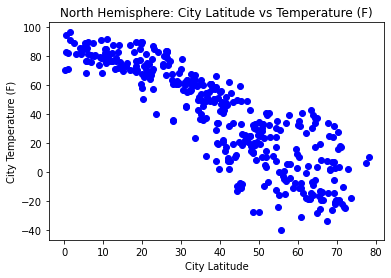

In [75]:
plt.scatter(x_values, y_values, facecolors = 'blue', marker = 'o')
plt.title("North Hemisphere: City Latitude vs Temperature (F)")
plt.xlabel("City Latitude")
plt.ylabel("City Temperature (F)")

plt.show()
#Observations: The further away from the equator, the colder the temperature. (drops in a linear way) 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [76]:
#define souhern hemisphere dataframe
southtemp = weatherdf[weatherdf["Latitude"]<0]
southtemp 

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed
2,faanui,PF,-16.4833,-151.7500,81.75,68,29,4.58
3,rikitea,PF,-23.1203,-134.9692,79.38,70,9,2.02
8,east london,ZA,-33.0153,27.9116,84.20,74,0,4.63
10,port-gentil,GA,-0.7193,8.7815,87.80,74,40,3.60
11,kerema,PG,-7.9631,145.7785,81.57,75,100,0.95
...,...,...,...,...,...,...,...,...
533,yantzaza,EC,-3.8278,-78.7594,68.18,84,100,0.24
534,yeppoon,AU,-23.1333,150.7333,78.80,50,40,4.12
535,mendi,PG,-6.1761,143.6513,58.35,99,100,0.12
536,maltahohe,NA,-24.8333,16.9833,78.04,40,2,9.06


In [77]:
#define the axis
x_values = southtemp['Latitude']
y_values = southtemp['Temperature']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#define regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
stats.linregress(x_values, y_values)

y = 0.4x +82.83


LinregressResult(slope=0.40327896316450496, intercept=82.82905487637817, rvalue=0.5551046025290757, pvalue=3.982684570314177e-15, stderr=0.046621351449818126)

The r value is: 0.3081411197489631


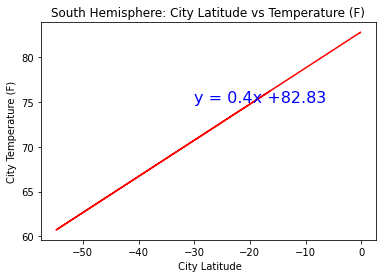

In [80]:
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("South Hemisphere: City Latitude vs Temperature (F)")
plt.xlabel(' City Latitude')
plt.ylabel('City Temperature (F)')
plt.annotate(line_eq,(-30,75),fontsize=16,color="blue")

# Print r value by squaring it
print(f"The r value is: {rvalue**2}")

# Show plot
plt.savefig('regresslatvstemp2.png')
plt.show()
#Answer: This is modeling the temperature changing at 0.37 degrees Farhenheit for each degree in latitude it is away from the coldest city in the Southern Hemisphere.

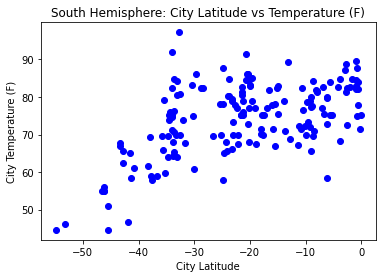

In [81]:
#scatterplot southern hemisphere latitude vs temperature
plt.scatter(southtemp["Latitude"], southtemp["Temperature"], facecolors = 'blue', marker = 'o')
plt.title("South Hemisphere: City Latitude vs Temperature (F)")
plt.xlabel("City Latitude")
plt.ylabel("City Temperature (F)")

plt.show()
#Observations: The cities in the souther hemisphere show an decrease in temperature as they get further from the equator.
#The correlation isn't as strong as the northern hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [82]:
#define the axis
x_values = northtemp['Latitude']
y_values = northtemp['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#define regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
stats.linregress(x_values, y_values)

y = 0.46x +50.83


LinregressResult(slope=0.45951309017526254, intercept=50.82577351616061, rvalue=0.38416406598543956, pvalue=1.8524539626725613e-14, stderr=0.05756831757189988)

The r value is: 0.14758202959446517


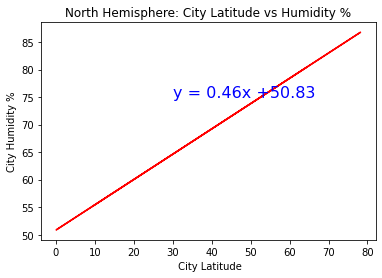

In [85]:
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("North Hemisphere: City Latitude vs Humidity %")
plt.xlabel(' City Latitude')
plt.ylabel('City Humidity %')
plt.annotate(line_eq,(30,75),fontsize=16,color="blue")

# Print r value by squaring it
print(f"The r value is: {rvalue**2}")

# Show plot
plt.savefig('latvshum.png')
plt.show()
#Answer: The increase in city humidity is 0.39% for each latitude degree it is away from the hottest city in the Northern Hemisphere.

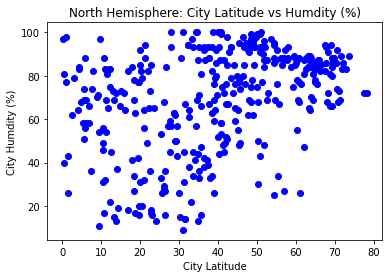

In [86]:
plt.scatter(northtemp["Latitude"], northtemp["Humidity"], facecolors = 'blue', marker = 'o')

plt.title("North Hemisphere: City Latitude vs Humdity (%)")
plt.xlabel("City Latitude")
plt.ylabel("City Humdity (%)")

plt.show()
#Observations: The further away from the equator, the clolder the temperature. (drops in a linear way)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [87]:
#define the axis
x_values = southtemp['Latitude']
y_values = southtemp['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#define regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
stats.linregress(x_values, y_values)

y = 0.21x +80.62


LinregressResult(slope=0.21228744908469718, intercept=80.62062713739179, rvalue=0.1730255296152375, pvalue=0.02404693736203581, stderr=0.09323077056161093)

The r value is: 0.029937833898633432


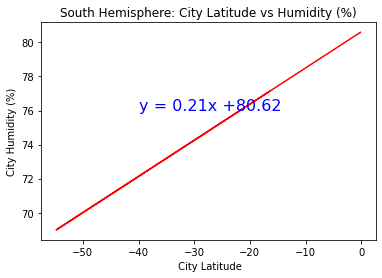

In [90]:
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("South Hemisphere: City Latitude vs Humidity (%)")
plt.xlabel(' City Latitude')
plt.ylabel('City Humidity (%)')
plt.annotate(line_eq,(-40,76),fontsize=16,color="blue")

# Print r value by squaring it
print(f"The r value is: {rvalue**2}")

# Show plot
plt.savefig('latvshum2.png')
plt.show()
#Answer: The city humidity increases by 0.38% for each latitude degree it is away from the coldest city in the Southern Hemisphere.

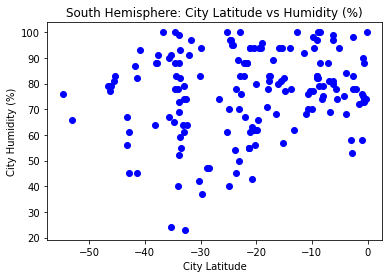

In [91]:
plt.scatter(southtemp["Latitude"], southtemp["Humidity"], facecolors = 'blue', marker = 'o')

plt.title("South Hemisphere: City Latitude vs Humidity (%)")
plt.xlabel("City Latitude")
plt.ylabel("City Humidity (%)")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [92]:
#define the axis
x_values = northtemp['Latitude']
y_values = northtemp['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#define regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
stats.linregress(x_values, y_values)

y = 0.49x +28.74


LinregressResult(slope=0.49387098930501605, intercept=28.744831809082374, rvalue=0.24081237683190204, pvalue=2.7917275743770027e-06, stderr=0.10376202059139693)

The r value is: 0.05799060083542999


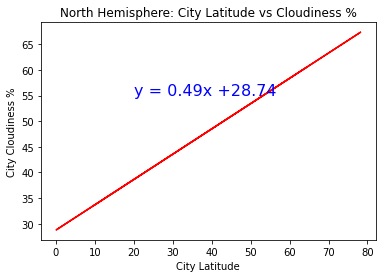

In [96]:
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("North Hemisphere: City Latitude vs Cloudiness %")
plt.xlabel('City Latitude')
plt.ylabel('City Cloudiness %')
plt.annotate(line_eq,(20,55),fontsize=16,color="blue")

# Print r value by squaring it
print(f"The r value is: {rvalue**2}")

# Show plot
plt.savefig('latvscloud.png')
plt.show()
#Answer: The cloudiness changes by 0.24% for every latitude degree it is away from the equator

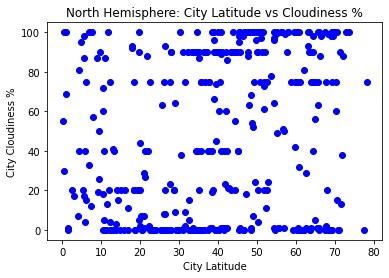

In [97]:
plt.scatter(northtemp["Latitude"], northtemp["Cloudiness"], facecolors = 'blue', marker = 'o')

plt.title("North Hemisphere: City Latitude vs Cloudiness %")
plt.xlabel("City Latitude")
plt.ylabel("City Cloudiness %")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [98]:
#define the axis
x_values = southtemp['Latitude']
y_values = southtemp['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#define regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
stats.linregress(x_values, y_values)

y = 0.67x +77.66


LinregressResult(slope=0.6695415964413128, intercept=77.65778077571433, rvalue=0.24802032983303335, pvalue=0.0011100570323614454, stderr=0.20176671426706358)

The r value is: 0.06151408401048665


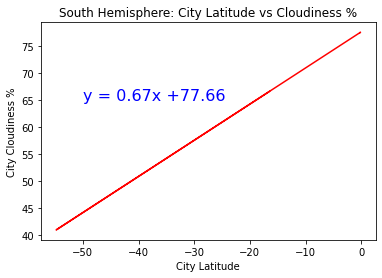

In [102]:
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("South Hemisphere: City Latitude vs Cloudiness %")
plt.xlabel('City Latitude')
plt.ylabel('City Cloudiness %')
plt.annotate(line_eq,(-50,65),fontsize=16,color="blue")

# Print r value by squaring it
print(f"The r value is: {rvalue**2}")

# Show plot
plt.savefig('latvscloud2.png')
plt.show()
#Answer: The cloudiness changes by 1.03% for every latitude degree it is towards the equator

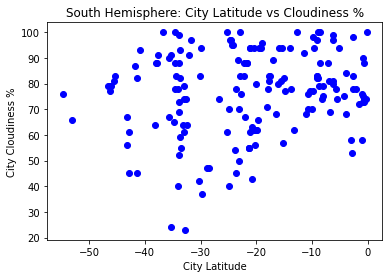

In [103]:
plt.scatter(southtemp["Latitude"], southtemp["Humidity"], facecolors = 'blue', marker = 'o')

plt.title("South Hemisphere: City Latitude vs Cloudiness %")
plt.xlabel("City Latitude")
plt.ylabel("City Cloudiness %")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [104]:
#define the axis
x_values = northtemp['Latitude']
y_values = northtemp['Windspeed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#define regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
stats.linregress(x_values, y_values)

y = 0.02x +3.0


LinregressResult(slope=0.02355662941003705, intercept=2.99503495123807, rvalue=0.1515437263224885, pvalue=0.0034775520570632414, stderr=0.008009515162826747)

The r value is: 0.022965500987705292


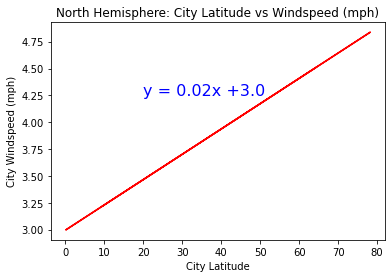

In [110]:
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("North Hemisphere: City Latitude vs Windspeed (mph)")
plt.xlabel('City Latitude')
plt.ylabel('City Windspeed (mph)')
plt.annotate(line_eq,(20,4.25),fontsize=16,color="blue")

# Print r value by squaring it
print(f"The r value is: {rvalue**2}")

# Show plot
plt.savefig('latvswind.png')
plt.show()
#Answer: The windspeed goes up by 0.01 mph per every latitude degree away from the equator in the Northern Hemisphere.

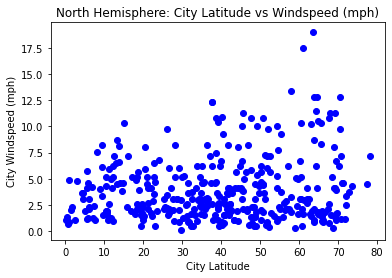

In [111]:
plt.scatter(northtemp["Latitude"], northtemp["Windspeed"], facecolors = 'blue', marker = 'o')

plt.title("North Hemisphere: City Latitude vs Windspeed (mph)")
plt.xlabel("City Latitude")
plt.ylabel("City Windspeed (mph)")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [112]:
#define the axis
x_values = southtemp['Latitude']
y_values = southtemp['Windspeed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#define regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
stats.linregress(x_values, y_values)

y = -0.04x +2.36


LinregressResult(slope=-0.044428971861361334, intercept=2.361774531923674, rvalue=-0.24301341874568896, pvalue=0.0014073672980021586, stderr=0.013682434136635009)

The r value is: 0.05905552169046757


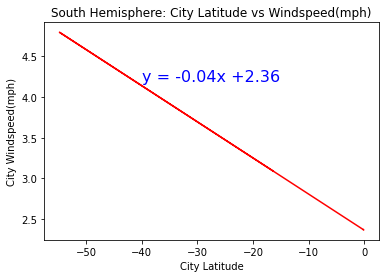

In [117]:
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("South Hemisphere: City Latitude vs Windspeed(mph)")
plt.xlabel('City Latitude')
plt.ylabel('City Windspeed(mph)')
plt.annotate(line_eq,(-40,4.2),fontsize=16,color="blue")

# Print r value by squaring it
print(f"The r value is: {rvalue**2}")

# Show plot
plt.savefig('latvswind2.png')
plt.show()
#Answer: The windspeed goes down by 0.03 mph per every latitude degree towards the equator in the Southern Hemisphere.

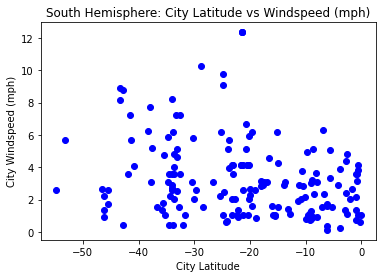

In [118]:
plt.scatter(southtemp["Latitude"], southtemp["Windspeed"], facecolors = 'blue', marker = 'o')

plt.title("South Hemisphere: City Latitude vs Windspeed (mph)")
plt.xlabel("City Latitude")
plt.ylabel("City Windspeed (mph)")

plt.show()

In [119]:
weatherdf.to_csv('weatherAPI')